In [2]:
import pandas as pd
import os
from PIL import Image
import numpy as np
import tensorflow as tf
import keras

In [3]:
labels=['CaS','CoS','Gum','MC','OC','OLP','OT']


In [4]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
def load_dataset(data_path="/content/teeth_data/Teeth_Dataset/Training", labels=None, target_size=(128, 128)):
    data = []
    for class_name in sorted(os.listdir(data_path)):
        if labels is None or class_name in labels:
            class_dir = os.path.join(data_path, class_name)
            for file_name in sorted(os.listdir(class_dir)):
                try:
                    image_path = os.path.join(class_dir, file_name)
                    image = Image.open(image_path).convert("RGB")
                    image = image.resize(target_size)
                    image_array = np.array(image, dtype=np.float32) / 255.0
                    data.append({"image": image_array, "label": class_name})
                except Exception as e:
                    print(f"Could not load {file_name}: {e}")
    return pd.DataFrame(data)


In [6]:
train = load_dataset(data_path="/content/drive/MyDrive/Teeth_Dataset/Training",labels=labels)
test = load_dataset(data_path="/content/drive/MyDrive/Teeth_Dataset/Testing",labels=labels)
val = load_dataset(data_path="/content/drive/MyDrive/Teeth_Dataset/Validation",labels=labels)

In [7]:
train.head(10)

,image,label
0,"[[[0.9882353, 0.8509804, 0.77254903], [0.98823...",CaS
1,"[[[0.99215686, 0.84705883, 0.77254903], [0.984...",CaS
2,"[[[1.0, 1.0, 0.93333334], [0.99215686, 1.0, 0....",CaS
3,"[[[1.0, 1.0, 0.92156863], [1.0, 1.0, 0.9215686...",CaS
4,"[[[0.9019608, 0.7607843, 0.65882355], [0.90196...",CaS
5,"[[[0.95686275, 0.7764706, 0.6862745], [0.97647...",CaS
6,"[[[0.03529412, 0.05882353, 0.050980393], [0.03...",CaS
7,"[[[0.7529412, 0.57254905, 0.47843137], [0.7490...",CaS
8,"[[[0.4392157, 0.34509805, 0.30588236], [0.4666...",CaS
9,"[[[0.9882353, 0.8784314, 0.7607843], [1.0, 0.8...",CaS


In [8]:
val.head(10)

,image,label
0,"[[[1.0, 0.94509804, 0.88235295], [1.0, 0.94901...",CaS
1,"[[[0.8039216, 0.62352943, 0.53333336], [0.8, 0...",CaS
2,"[[[0.11764706, 0.09411765, 0.09019608], [0.243...",CaS
3,"[[[0.7921569, 0.44705883, 0.36862746], [0.8039...",CaS
4,"[[[0.5921569, 0.28235295, 0.21568628], [0.5960...",CaS
5,"[[[0.44705883, 0.2, 0.12941177], [0.44705883, ...",CaS
6,"[[[0.7882353, 0.6156863, 0.5176471], [0.788235...",CaS
7,"[[[0.6901961, 0.5647059, 0.5137255], [0.690196...",CaS
8,"[[[0.81960785, 0.67058825, 0.61960787], [0.819...",CaS
9,"[[[0.7411765, 0.6666667, 0.6117647], [0.745098...",CaS


In [9]:
shapes = []
for img in train['image']:
    if img.shape not in shapes:
        shapes.append(img.shape)
shapes

[(128, 128, 3)]

In [10]:
len(train)

3087

In [11]:
label_counts = train['label'].value_counts()
label_counts_dict = label_counts.to_dict()
print(label_counts_dict)

{'MC': 540, 'OLP': 540, 'CaS': 480, 'CoS': 450, 'OT': 393, 'Gum': 360, 'OC': 324}


In [12]:
# def preprocess_data(img):
#     arr=np.array(img).astype('float32')/255
#     return arr


In [13]:
# train['image']=train['image'].apply(preprocess_data)
# val['image']=val['image'].apply(preprocess_data)

In [14]:
import tensorflow as tf
import keras

In [15]:
# train['label'] = train['label'].map(label_map)
# val['label'] = val['label'].map(label_map)

In [16]:
label_map = {label: i for i, label in enumerate(sorted(set(train["label"]) | set(val["label"])))}
train["label"] = train["label"].map(label_map)
val["label"] = val["label"].map(label_map)
test["label"] = test["label"].map(label_map)

In [17]:
print("Train labels:", np.unique(train['label']))
print("Val labels:  ", np.unique(val['label']))
print("Test labels:  ", np.unique(test['label']))

Train labels: [0 1 2 3 4 5 6]
Val labels:   [0 1 2 3 4 5 6]
Test labels:   [0 1 2 3 4 5 6]


In [18]:
X_train = np.stack(train['image'].values).astype(np.float32)
y_train = np.stack(train['label'].values)

X_val = np.stack(val['image'].values).astype(np.float32)
y_val = np.stack(val['label'].values)

X_test = np.stack(test['image'].values).astype(np.float32)
y_test= np.stack(test['label'].values)

In [19]:
from tensorflow.keras.utils import to_categorical

y_train_oh = to_categorical(y_train, num_classes=7)
y_val_oh = to_categorical(y_val, num_classes=7)
y_test_oh = to_categorical(y_test, num_classes=7)

In [20]:
train.head(10)

,image,label
0,"[[[0.9882353, 0.8509804, 0.77254903], [0.98823...",0
1,"[[[0.99215686, 0.84705883, 0.77254903], [0.984...",0
2,"[[[1.0, 1.0, 0.93333334], [0.99215686, 1.0, 0....",0
3,"[[[1.0, 1.0, 0.92156863], [1.0, 1.0, 0.9215686...",0
4,"[[[0.9019608, 0.7607843, 0.65882355], [0.90196...",0
5,"[[[0.95686275, 0.7764706, 0.6862745], [0.97647...",0
6,"[[[0.03529412, 0.05882353, 0.050980393], [0.03...",0
7,"[[[0.7529412, 0.57254905, 0.47843137], [0.7490...",0
8,"[[[0.4392157, 0.34509805, 0.30588236], [0.4666...",0
9,"[[[0.9882353, 0.8784314, 0.7607843], [1.0, 0.8...",0


In [21]:
val.head(10)

,image,label
0,"[[[1.0, 0.94509804, 0.88235295], [1.0, 0.94901...",0
1,"[[[0.8039216, 0.62352943, 0.53333336], [0.8, 0...",0
2,"[[[0.11764706, 0.09411765, 0.09019608], [0.243...",0
3,"[[[0.7921569, 0.44705883, 0.36862746], [0.8039...",0
4,"[[[0.5921569, 0.28235295, 0.21568628], [0.5960...",0
5,"[[[0.44705883, 0.2, 0.12941177], [0.44705883, ...",0
6,"[[[0.7882353, 0.6156863, 0.5176471], [0.788235...",0
7,"[[[0.6901961, 0.5647059, 0.5137255], [0.690196...",0
8,"[[[0.81960785, 0.67058825, 0.61960787], [0.819...",0
9,"[[[0.7411765, 0.6666667, 0.6117647], [0.745098...",0


In [22]:
print(y_train[:5])
print(y_train_oh[:2])

[0 0 0 0 0]
[[1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]]


In [23]:
y_train.shape

(3087,)

In [24]:
X_train.shape

(3087, 128, 128, 3)

In [25]:
X_train.shape[1:]

(128, 128, 3)

In [26]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train_oh)).shuffle(buffer_size=len(X_train)).batch(16)
val_ds   = tf.data.Dataset.from_tensor_slices((X_val, y_val_oh)).batch(16)
test_ds   = tf.data.Dataset.from_tensor_slices((X_test, y_test_oh)).batch(16)

In [27]:
input_shape = (128,128,3)
with tf.device('/GPU:0'):
 model = keras.Sequential([
    keras.layers.Input(shape=input_shape),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same' ),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D(),
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.L1L2(l1=1e-6, l2=1e-4)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(7, activation='softmax')
])

In [28]:
sgd = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy','categorical_accuracy'])

In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 130,247 (508.78 KB)

 Trainable params: 130,119 (508.28 KB)

 Non-trainable params: 128 (512.00 B)

In [30]:
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    "best_model.h5",
    save_best_only=True,
    monitor="val_loss",
    mode="min",
    verbose=1
)


In [31]:
hist= model.fit(train_ds, epochs=100,validation_data=val_ds,verbose=1,callbacks=[checkpoint_cb])

Epoch 1/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.1867 - categorical_accuracy: 0.1867 - loss: 1.9386
Epoch 1: val_loss improved from inf to 1.92200, saving model to best_model.h5


193/193 ━━━━━━━━━━━━━━━━━━━━ 15s 44ms/step - accuracy: 0.1869 - categorical_accuracy: 0.1869 - loss: 1.9383 - val_accuracy: 0.1508 - val_categorical_accuracy: 0.1508 - val_loss: 1.9220
Epoch 2/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3087 - categorical_accuracy: 0.3087 - loss: 1.7360
Epoch 2: val_loss improved from 1.92200 to 1.87541, saving model to best_model.h5


193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.3088 - categorical_accuracy: 0.3088 - loss: 1.7359 - val_accuracy: 0.2082 - val_categorical_accuracy: 0.2082 - val_loss: 1.8754
Epoch 3/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3536 - categorical_accuracy: 0.3536 - loss: 1.6499
Epoch 3: val_loss improved from 1.87541 to 1.69102, saving model to best_model.h5


193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.3536 - categorical_accuracy: 0.3536 - loss: 1.6499 - val_accuracy: 0.3638 - val_categorical_accuracy: 0.3638 - val_loss: 1.6910
Epoch 4/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4073 - categorical_accuracy: 0.4073 - loss: 1.5351
Epoch 4: val_loss did not improve from 1.69102
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.4072 - categorical_accuracy: 0.4072 - loss: 1.5351 - val_accuracy: 0.3016 - val_categorical_accuracy: 0.3016 - val_loss: 2.0412
Epoch 5/100
190/193 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4187 - categorical_accuracy: 0.4187 - loss: 1.4885
Epoch 5: val_loss did not improve from 1.69102
193/193 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.4190 - categorical_accuracy: 0.4190 - loss: 1.4882 - val_accuracy: 0.3132 - val_categorical_accuracy: 0.3132 - val_loss: 2.0102
Epoch 6/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4558 - categorical_accuracy: 0.4558 - loss: 1.38

193/193 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.4852 - categorical_accuracy: 0.4852 - loss: 1.3502 - val_accuracy: 0.4708 - val_categorical_accuracy: 0.4708 - val_loss: 1.3364
Epoch 8/100
190/193 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5169 - categorical_accuracy: 0.5169 - loss: 1.2826
Epoch 8: val_loss did not improve from 1.33639
193/193 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.5170 - categorical_accuracy: 0.5170 - loss: 1.2825 - val_accuracy: 0.4368 - val_categorical_accuracy: 0.4368 - val_loss: 1.5043
Epoch 9/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5460 - categorical_accuracy: 0.5460 - loss: 1.2224
Epoch 9: val_loss improved from 1.33639 to 1.19834, saving model to best_model.h5


193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.5460 - categorical_accuracy: 0.5460 - loss: 1.2223 - val_accuracy: 0.5389 - val_categorical_accuracy: 0.5389 - val_loss: 1.1983
Epoch 10/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5955 - categorical_accuracy: 0.5955 - loss: 1.0991
Epoch 10: val_loss did not improve from 1.19834
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.5955 - categorical_accuracy: 0.5955 - loss: 1.0992 - val_accuracy: 0.5019 - val_categorical_accuracy: 0.5019 - val_loss: 1.3174
Epoch 11/100
191/193 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6076 - categorical_accuracy: 0.6076 - loss: 1.0436
Epoch 11: val_loss improved from 1.19834 to 1.10125, saving model to best_model.h5


193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.6076 - categorical_accuracy: 0.6076 - loss: 1.0439 - val_accuracy: 0.5895 - val_categorical_accuracy: 0.5895 - val_loss: 1.1012
Epoch 12/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6395 - categorical_accuracy: 0.6395 - loss: 0.9931
Epoch 12: val_loss did not improve from 1.10125
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.6395 - categorical_accuracy: 0.6395 - loss: 0.9931 - val_accuracy: 0.5175 - val_categorical_accuracy: 0.5175 - val_loss: 1.3189
Epoch 13/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6496 - categorical_accuracy: 0.6496 - loss: 0.9260
Epoch 13: val_loss improved from 1.10125 to 1.02470, saving model to best_model.h5


193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.6497 - categorical_accuracy: 0.6497 - loss: 0.9261 - val_accuracy: 0.6265 - val_categorical_accuracy: 0.6265 - val_loss: 1.0247
Epoch 14/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6795 - categorical_accuracy: 0.6795 - loss: 0.8830
Epoch 14: val_loss improved from 1.02470 to 0.81348, saving model to best_model.h5


193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.6795 - categorical_accuracy: 0.6795 - loss: 0.8830 - val_accuracy: 0.6975 - val_categorical_accuracy: 0.6975 - val_loss: 0.8135
Epoch 15/100
192/193 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7057 - categorical_accuracy: 0.7057 - loss: 0.8029
Epoch 15: val_loss did not improve from 0.81348
193/193 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.7056 - categorical_accuracy: 0.7056 - loss: 0.8031 - val_accuracy: 0.5837 - val_categorical_accuracy: 0.5837 - val_loss: 1.1252
Epoch 16/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7133 - categorical_accuracy: 0.7133 - loss: 0.7765
Epoch 16: val_loss improved from 0.81348 to 0.76946, saving model to best_model.h5


193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.7133 - categorical_accuracy: 0.7133 - loss: 0.7765 - val_accuracy: 0.7189 - val_categorical_accuracy: 0.7189 - val_loss: 0.7695
Epoch 17/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7173 - categorical_accuracy: 0.7173 - loss: 0.7651
Epoch 17: val_loss did not improve from 0.76946
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.7173 - categorical_accuracy: 0.7173 - loss: 0.7650 - val_accuracy: 0.6907 - val_categorical_accuracy: 0.6907 - val_loss: 0.9323
Epoch 18/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7619 - categorical_accuracy: 0.7619 - loss: 0.6772
Epoch 18: val_loss did not improve from 0.76946
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.7619 - categorical_accuracy: 0.7619 - loss: 0.6772 - val_accuracy: 0.6294 - val_categorical_accuracy: 0.6294 - val_loss: 1.0327
Epoch 19/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7671 - categorical_accuracy: 0.7671 - loss:

193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.7672 - categorical_accuracy: 0.7672 - loss: 0.6501 - val_accuracy: 0.7179 - val_categorical_accuracy: 0.7179 - val_loss: 0.7472
Epoch 20/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7797 - categorical_accuracy: 0.7797 - loss: 0.6293
Epoch 20: val_loss did not improve from 0.74717
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.7797 - categorical_accuracy: 0.7797 - loss: 0.6293 - val_accuracy: 0.6041 - val_categorical_accuracy: 0.6041 - val_loss: 1.2949
Epoch 21/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8034 - categorical_accuracy: 0.8034 - loss: 0.5727
Epoch 21: val_loss did not improve from 0.74717
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.8033 - categorical_accuracy: 0.8033 - loss: 0.5727 - val_accuracy: 0.5438 - val_categorical_accuracy: 0.5438 - val_loss: 1.5896
Epoch 22/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8070 - categorical_accuracy: 0.8070 - loss:

193/193 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8319 - categorical_accuracy: 0.8319 - loss: 0.4956 - val_accuracy: 0.7733 - val_categorical_accuracy: 0.7733 - val_loss: 0.6642
Epoch 25/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8626 - categorical_accuracy: 0.8626 - loss: 0.4509
Epoch 25: val_loss did not improve from 0.66420
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.8625 - categorical_accuracy: 0.8625 - loss: 0.4510 - val_accuracy: 0.6109 - val_categorical_accuracy: 0.6109 - val_loss: 1.3708
Epoch 26/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8335 - categorical_accuracy: 0.8335 - loss: 0.4718
Epoch 26: val_loss did not improve from 0.66420
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.8335 - categorical_accuracy: 0.8335 - loss: 0.4717 - val_accuracy: 0.7665 - val_categorical_accuracy: 0.7665 - val_loss: 0.6761
Epoch 27/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8441 - categorical_accuracy: 0.8441 - loss:

193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8441 - categorical_accuracy: 0.8441 - loss: 0.4476 - val_accuracy: 0.8035 - val_categorical_accuracy: 0.8035 - val_loss: 0.5745
Epoch 28/100
191/193 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8539 - categorical_accuracy: 0.8539 - loss: 0.4235
Epoch 28: val_loss did not improve from 0.57454
193/193 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8539 - categorical_accuracy: 0.8539 - loss: 0.4235 - val_accuracy: 0.7860 - val_categorical_accuracy: 0.7860 - val_loss: 0.6789
Epoch 29/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8747 - categorical_accuracy: 0.8747 - loss: 0.3657
Epoch 29: val_loss improved from 0.57454 to 0.53318, saving model to best_model.h5


193/193 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.8747 - categorical_accuracy: 0.8747 - loss: 0.3658 - val_accuracy: 0.8054 - val_categorical_accuracy: 0.8054 - val_loss: 0.5332
Epoch 30/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8838 - categorical_accuracy: 0.8838 - loss: 0.3570
Epoch 30: val_loss improved from 0.53318 to 0.38302, saving model to best_model.h5


193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8838 - categorical_accuracy: 0.8838 - loss: 0.3571 - val_accuracy: 0.8765 - val_categorical_accuracy: 0.8765 - val_loss: 0.3830
Epoch 31/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8742 - categorical_accuracy: 0.8742 - loss: 0.3582
Epoch 31: val_loss did not improve from 0.38302
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.8742 - categorical_accuracy: 0.8742 - loss: 0.3582 - val_accuracy: 0.8473 - val_categorical_accuracy: 0.8473 - val_loss: 0.4904
Epoch 32/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9027 - categorical_accuracy: 0.9027 - loss: 0.3073
Epoch 32: val_loss did not improve from 0.38302
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9026 - categorical_accuracy: 0.9026 - loss: 0.3076 - val_accuracy: 0.8512 - val_categorical_accuracy: 0.8512 - val_loss: 0.4373
Epoch 33/100
191/193 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8922 - categorical_accuracy: 0.8922 - loss:

193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.8970 - categorical_accuracy: 0.8970 - loss: 0.3075 - val_accuracy: 0.8872 - val_categorical_accuracy: 0.8872 - val_loss: 0.3657
Epoch 37/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9131 - categorical_accuracy: 0.9131 - loss: 0.2723
Epoch 37: val_loss did not improve from 0.36568
193/193 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9130 - categorical_accuracy: 0.9130 - loss: 0.2725 - val_accuracy: 0.7549 - val_categorical_accuracy: 0.7549 - val_loss: 0.8193
Epoch 38/100
190/193 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9040 - categorical_accuracy: 0.9040 - loss: 0.2816
Epoch 38: val_loss did not improve from 0.36568
193/193 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9039 - categorical_accuracy: 0.9039 - loss: 0.2819 - val_accuracy: 0.8677 - val_categorical_accuracy: 0.8677 - val_loss: 0.4184
Epoch 39/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8939 - categorical_accuracy: 0.8939 - loss:

193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9345 - categorical_accuracy: 0.9345 - loss: 0.1963 - val_accuracy: 0.8969 - val_categorical_accuracy: 0.8969 - val_loss: 0.3080
Epoch 48/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9278 - categorical_accuracy: 0.9278 - loss: 0.2326
Epoch 48: val_loss did not improve from 0.30804
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9278 - categorical_accuracy: 0.9278 - loss: 0.2326 - val_accuracy: 0.7733 - val_categorical_accuracy: 0.7733 - val_loss: 0.8698
Epoch 49/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9307 - categorical_accuracy: 0.9307 - loss: 0.2258
Epoch 49: val_loss did not improve from 0.30804
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9307 - categorical_accuracy: 0.9307 - loss: 0.2258 - val_accuracy: 0.8103 - val_categorical_accuracy: 0.8103 - val_loss: 0.6417
Epoch 50/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9524 - categorical_accuracy: 0.9524 - loss:

193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9524 - categorical_accuracy: 0.9524 - loss: 0.1752 - val_accuracy: 0.9183 - val_categorical_accuracy: 0.9183 - val_loss: 0.2506
Epoch 51/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9280 - categorical_accuracy: 0.9280 - loss: 0.2243
Epoch 51: val_loss did not improve from 0.25062
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9280 - categorical_accuracy: 0.9280 - loss: 0.2243 - val_accuracy: 0.8696 - val_categorical_accuracy: 0.8696 - val_loss: 0.4689
Epoch 52/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9469 - categorical_accuracy: 0.9469 - loss: 0.1903
Epoch 52: val_loss did not improve from 0.25062
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9469 - categorical_accuracy: 0.9469 - loss: 0.1903 - val_accuracy: 0.9163 - val_categorical_accuracy: 0.9163 - val_loss: 0.3110
Epoch 53/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9415 - categorical_accuracy: 0.9415 - loss:

193/193 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9318 - categorical_accuracy: 0.9318 - loss: 0.2283 - val_accuracy: 0.9300 - val_categorical_accuracy: 0.9300 - val_loss: 0.2452
Epoch 57/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9503 - categorical_accuracy: 0.9503 - loss: 0.1778
Epoch 57: val_loss did not improve from 0.24522
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9503 - categorical_accuracy: 0.9503 - loss: 0.1778 - val_accuracy: 0.9251 - val_categorical_accuracy: 0.9251 - val_loss: 0.2669
Epoch 58/100
190/193 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9529 - categorical_accuracy: 0.9529 - loss: 0.1674
Epoch 58: val_loss did not improve from 0.24522
193/193 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9526 - categorical_accuracy: 0.9526 - loss: 0.1679 - val_accuracy: 0.8988 - val_categorical_accuracy: 0.8988 - val_loss: 0.2889
Epoch 59/100
192/193 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9473 - categorical_accuracy: 0.9473 - loss:

193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9437 - categorical_accuracy: 0.9437 - loss: 0.2057 - val_accuracy: 0.9455 - val_categorical_accuracy: 0.9455 - val_loss: 0.2060
Epoch 65/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9616 - categorical_accuracy: 0.9616 - loss: 0.1421
Epoch 65: val_loss did not improve from 0.20597
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9616 - categorical_accuracy: 0.9616 - loss: 0.1421 - val_accuracy: 0.8765 - val_categorical_accuracy: 0.8765 - val_loss: 0.4601
Epoch 66/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9620 - categorical_accuracy: 0.9620 - loss: 0.1467
Epoch 66: val_loss did not improve from 0.20597
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9620 - categorical_accuracy: 0.9620 - loss: 0.1466 - val_accuracy: 0.9066 - val_categorical_accuracy: 0.9066 - val_loss: 0.2934
Epoch 67/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9616 - categorical_accuracy: 0.9616 - loss:

193/193 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9616 - categorical_accuracy: 0.9616 - loss: 0.1448 - val_accuracy: 0.9475 - val_categorical_accuracy: 0.9475 - val_loss: 0.1857
Epoch 74/100
192/193 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9673 - categorical_accuracy: 0.9673 - loss: 0.1226
Epoch 74: val_loss did not improve from 0.18571
193/193 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9673 - categorical_accuracy: 0.9673 - loss: 0.1227 - val_accuracy: 0.9270 - val_categorical_accuracy: 0.9270 - val_loss: 0.2696
Epoch 75/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9506 - categorical_accuracy: 0.9506 - loss: 0.1740
Epoch 75: val_loss did not improve from 0.18571
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9506 - categorical_accuracy: 0.9506 - loss: 0.1740 - val_accuracy: 0.9261 - val_categorical_accuracy: 0.9261 - val_loss: 0.2857
Epoch 76/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9675 - categorical_accuracy: 0.9675 - loss:

193/193 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9774 - categorical_accuracy: 0.9774 - loss: 0.0980 - val_accuracy: 0.9591 - val_categorical_accuracy: 0.9591 - val_loss: 0.1555
Epoch 100/100
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9814 - categorical_accuracy: 0.9814 - loss: 0.0845
Epoch 100: val_loss did not improve from 0.15553
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9814 - categorical_accuracy: 0.9814 - loss: 0.0845 - val_accuracy: 0.8599 - val_categorical_accuracy: 0.8599 - val_loss: 0.6047


In [32]:
import matplotlib.pyplot as plt
def plot(training_results, validation_results, results_type, model_name):
    fig = plt.figure(figsize=[8, 6])

    plt.plot(training_results, 'r', linewidth=3.0)
    plt.plot(validation_results, 'b', linewidth=3.0)
    plt.legend(['Training ' + results_type, 'Validation ' + results_type], fontsize=18)
    plt.xlabel('Epochs', fontsize=16)
    plt.ylabel(results_type, fontsize=16)
    #plt.title(results_type + ' of ' + model_name, fontsize=16)


def plot_accuracy(history, model_name):
    plot(history.history['accuracy'], history.history['val_accuracy'], 'Accuracy', model_name)


def plot_loss(history, model_name):
    plot(history.history['loss'], history.history['val_loss'], 'Loss', model_name)

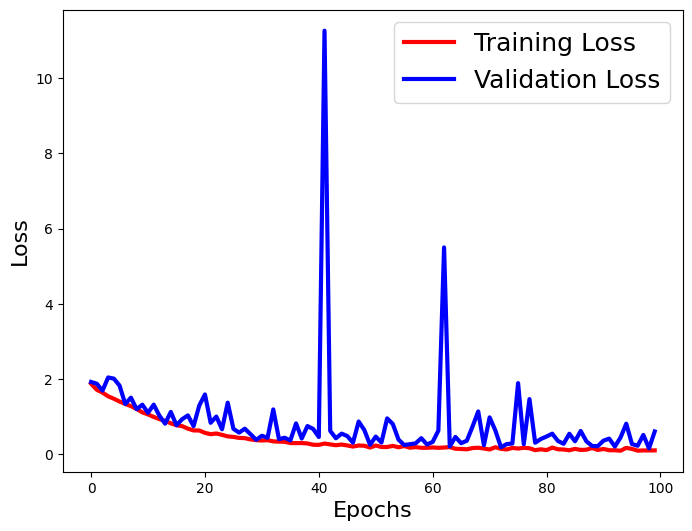

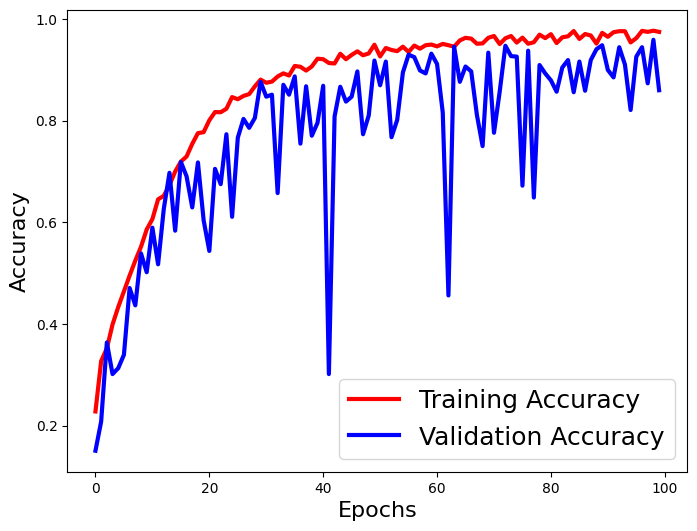

In [33]:
plot_loss(hist, model)
plot_accuracy(hist, model)

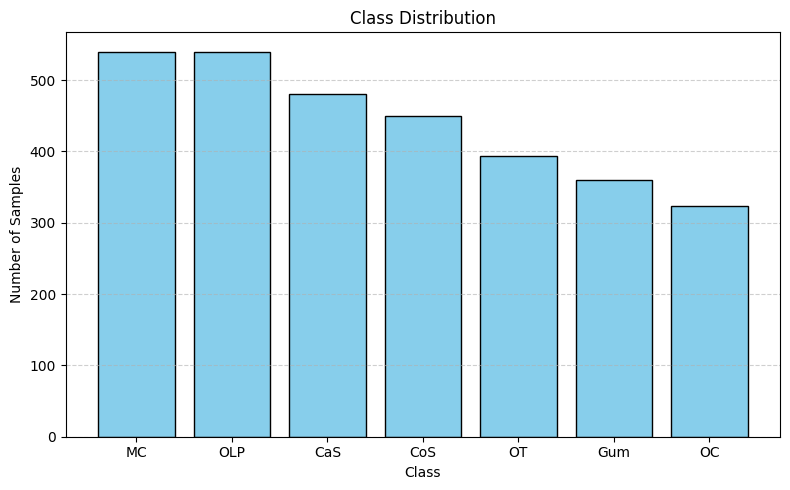

In [34]:
labels2 = list(label_counts_dict.keys())
counts = list(label_counts_dict.values())
plt.figure(figsize=(8, 5))
plt.bar(labels2, counts, color='skyblue', edgecolor='black')
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [36]:
metrics = model.evaluate(test_ds, return_dict=True)
for name, value in metrics.items():
    print(f"{name}: {value:.4f}")


65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8732 - categorical_accuracy: 0.8732 - loss: 0.4550
accuracy: 0.8658
categorical_accuracy: 0.8658
loss: 0.5906


In [ ]:
#load model/ try to make a new one, evaluate over test set.
